# Decision Tree 

In [5]:
# import numpy as np
import pandas as pd
df=pd.read_csv("Z:/Study/ziggy std/Mr. Prakash Senapathi/Class Notes/19th april decision tree/5. DECESSION TREE CODE/Social_Network_Ads.csv")

In [6]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [7]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
df.isnull().sum()  

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

as we can see that there is no null values in the dataset

In [9]:
del df['Gender']
del df['Age']

In [10]:
x=df.iloc[0:,:2]
x

,User ID,EstimatedSalary
0,15624510,19000
1,15810944,20000
2,15668575,43000
3,15603246,57000
4,15804002,76000
...,...,...
395,15691863,41000
396,15706071,23000
397,15654296,20000
398,15755018,33000


In [11]:
y=df.iloc[0:,-1:]
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


# Split the data into train test

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
X_train

,User ID,EstimatedSalary
336,15664907,144000
64,15605000,83000
55,15649136,55000
106,15706185,35000
300,15736397,38000
...,...,...
323,15619465,30000
192,15779581,43000
117,15591433,52000
47,15776348,54000


In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=8, min_samples_split=7, min_samples_leaf=10,)
classifier.fit(X_train_sc,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=7)

In [15]:
y_pred = classifier.predict(X_test_sc)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [16]:
y_test


,Purchased
132,0
309,0
341,0
196,0
246,0
...,...
14,0
363,0
304,0
361,1


In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[52  6]
 [10 12]]


In [18]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
print(ac)

0.8


In [24]:
bias = classifier.score(X_train_sc, y_train)
bias



0.821875

In [25]:
variance = classifier.score(X_test_sc, y_test)
variance

0.8

[Text(0.6036585365853658, 0.9444444444444444, 'X[1] <= 0.596\ngini = 0.47\nsamples = 320\nvalue = [199, 121]'),
 Text(0.4024390243902439, 0.8333333333333334, 'X[1] <= -0.824\ngini = 0.366\nsamples = 249\nvalue = [189, 60]'),
 Text(0.14634146341463414, 0.7222222222222222, 'X[1] <= -1.461\ngini = 0.491\nsamples = 74\nvalue = [42, 32]'),
 Text(0.0975609756097561, 0.6111111111111112, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.1951219512195122, 0.6111111111111112, 'X[0] <= -0.285\ngini = 0.499\nsamples = 61\nvalue = [29, 32]'),
 Text(0.0975609756097561, 0.5, 'X[0] <= -1.078\ngini = 0.423\nsamples = 23\nvalue = [7, 16]'),
 Text(0.04878048780487805, 0.3888888888888889, 'gini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.14634146341463414, 0.3888888888888889, 'gini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(0.2926829268292683, 0.5, 'X[1] <= -1.084\ngini = 0.488\nsamples = 38\nvalue = [22, 16]'),
 Text(0.24390243902439024, 0.3888888888888889, 'X[1] <= -1.258\ngini = 0.444\nsam

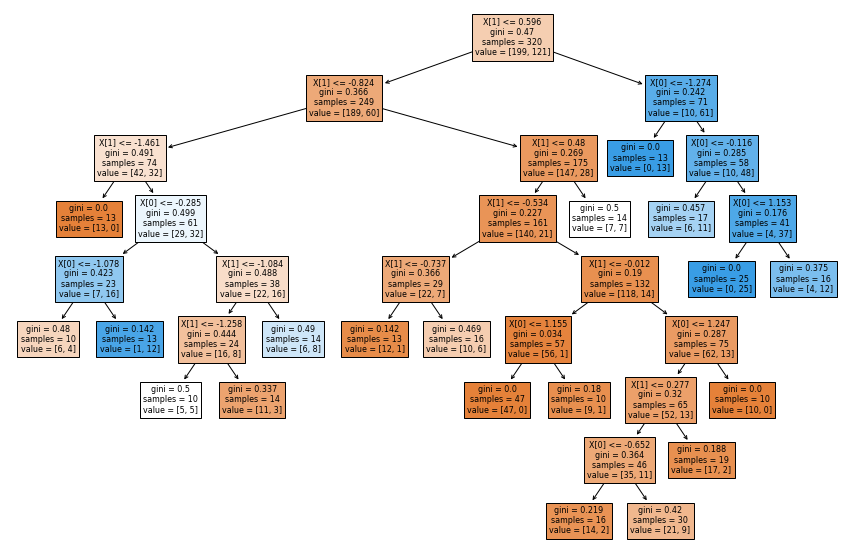

In [29]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [36]:
path = classifier.cost_complexity_pruning_path(X_train,y_train)
path

{'ccp_alphas': array([0.        , 0.00051535, 0.00175164, 0.00216667, 0.00297619,
        0.00313283, 0.00356083, 0.00387223, 0.008209  , 0.01099457,
        0.01843155, 0.02412504, 0.13195723]),
 'impurities': array([0.23377309, 0.23428844, 0.23779173, 0.2399584 , 0.24293459,
        0.24606742, 0.2567499 , 0.26836659, 0.28478459, 0.29577915,
        0.3142107 , 0.33833574, 0.47029297])}

In [38]:
ccp_alphas,impurities=path.ccp_alphas,path.impurities

In [39]:
ccp_alphas

array([0.        , 0.00051535, 0.00175164, 0.00216667, 0.00297619,
       0.00313283, 0.00356083, 0.00387223, 0.008209  , 0.01099457,
       0.01843155, 0.02412504, 0.13195723])

In [40]:
clfs = []
for ccp_alpha in ccp_alphas:
    classifier2 = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    classifier2.fit(X_train, y_train)
    clfs.append(classifier2)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.13195723143454113


# Accuracy vs Alpha


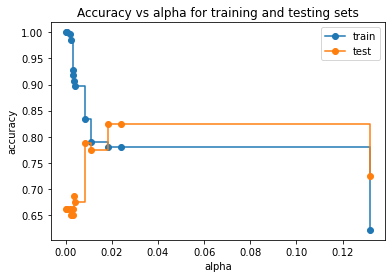

In [41]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [42]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.012)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.012, random_state=0)

In [43]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.775

[Text(0.6666666666666666, 0.875, 'X[1] <= 90500.0\ngini = 0.47\nsamples = 320\nvalue = [199, 121]'),
 Text(0.5, 0.625, 'X[1] <= 41500.0\ngini = 0.366\nsamples = 249\nvalue = [189, 60]'),
 Text(0.3333333333333333, 0.375, 'X[1] <= 19500.0\ngini = 0.491\nsamples = 74\nvalue = [42, 32]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.5, 0.125, 'gini = 0.499\nsamples = 61\nvalue = [29, 32]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.269\nsamples = 175\nvalue = [147, 28]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.242\nsamples = 71\nvalue = [10, 61]')]

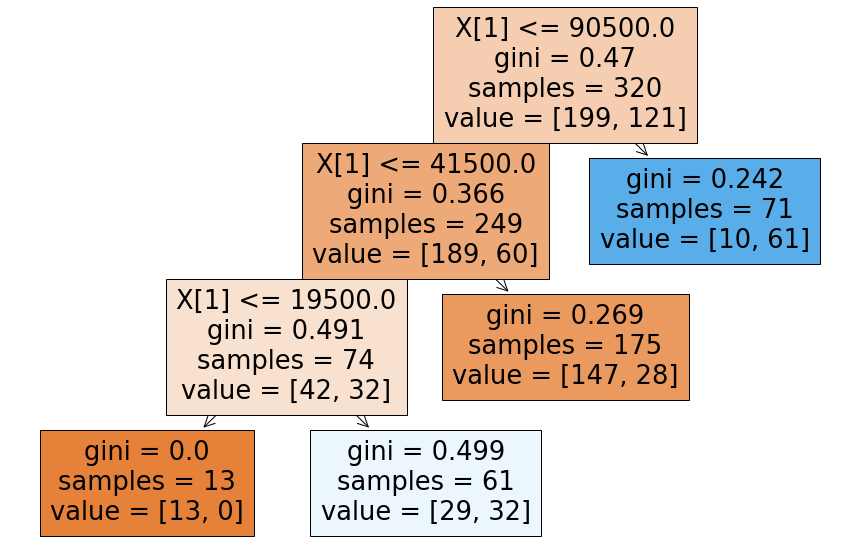

In [44]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)